Tech Layoffs Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('tech_layoffs.csv')
df.head(5)

,company,company_size,employees_fired
0,Apple,147000,0
1,Microsoft,181000,6000
2,Google,139500,15000
3,Amazon,1300000,12000
4,Facebook,60750,11000


Part 1 – Basic Data Understanding (Pandas)

In [3]:
#Display the first 10 rows.
df.head(10)

,company,company_size,employees_fired
0,Apple,147000,0
1,Microsoft,181000,6000
2,Google,139500,15000
3,Amazon,1300000,12000
4,Facebook,60750,11000
5,Tesla,70000,1000
6,Palantir,1008569,72661
7,PhonePe,850789,89997
8,Ola,135654,3909
9,Oracle,1116585,50166


In [4]:
#Show shape, column names, and data types.
df.shape


(100, 3)

In [5]:
df.columns


Index(['company', 'company_size', 'employees_fired'], dtype='object')

In [6]:
df.dtypes

company            object
company_size        int64
employees_fired     int64
dtype: object

In [7]:
#Check for missing values and duplicates.
df.isnull().sum()

company            0
company_size       0
employees_fired    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:

#Use .describe() to get summary statistics
df.describe()

,company_size,employees_fired
count,1.000000e+02,100.000000
mean,7.557156e+05,57355.620000
std,4.615541e+05,52862.274156
min,7.137000e+03,0.000000
25%,3.370110e+05,12968.250000
50%,8.116580e+05,42510.500000
75%,1.180989e+06,94080.750000
max,1.468680e+06,206083.000000


Part 2 – Data Cleaning

In [10]:
#Ensure company_size and employees_fired are stored as integers.
df["company_size"] = pd.to_numeric(df["company_size"], errors="coerce").astype("Int64")
df["employees_fired"] = pd.to_numeric(df["employees_fired"], errors="coerce").astype("Int64")


In [11]:
#Remove any extra spaces in company names.
df["company"] = df["company"].str.strip()

In [12]:
#Check for any negative values in employees_fired or company_size and correct them if needed.

df["company_size"] = df["company_size"].abs()
df["employees_fired"] = df["employees_fired"].abs()


In [13]:
#Standardize company names to title case.
df["company"] = df["company"].str.title()

Part 3 – Exploratory Data Analysis (EDA)


In [14]:
df.columns

Index(['company', 'company_size', 'employees_fired'], dtype='object')

In [15]:
#Calculate the total number of employees across all companies.
print(df['company_size'].sum())

75571557


In [16]:
#Calculate the total number of employees laid off across all companies.
print(df['employees_fired'].sum())

5735562


In [17]:

#Find the company with the highest number of layoffs.
max_layoff_company = df.loc[df["employees_fired"].idxmax(), ["company", "employees_fired"]]
print("\nCompany with Highest Layoffs:\n", max_layoff_company)


Company with Highest Layoffs:
 company            Makemytrip
employees_fired        206083
Name: 63, dtype: object


In [18]:
#Find the company with the highest layoff percentage.
df["layoff_percentage"] = (df["employees_fired"] / df["company_size"]) * 100
max_layoff_percentage = df.loc[df["layoff_percentage"].idxmax(), ["company", "layoff_percentage"]]
print("\nCompany with Highest Layoff Percentage:\n", max_layoff_percentage)


Company with Highest Layoff Percentage:
 company               Facebook
layoff_percentage    18.106996
Name: 4, dtype: object


C:\Users\dukas\AppData\Local\Temp\ipykernel_16744\1934033894.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="company", y="employees_fired", palette="viridis")


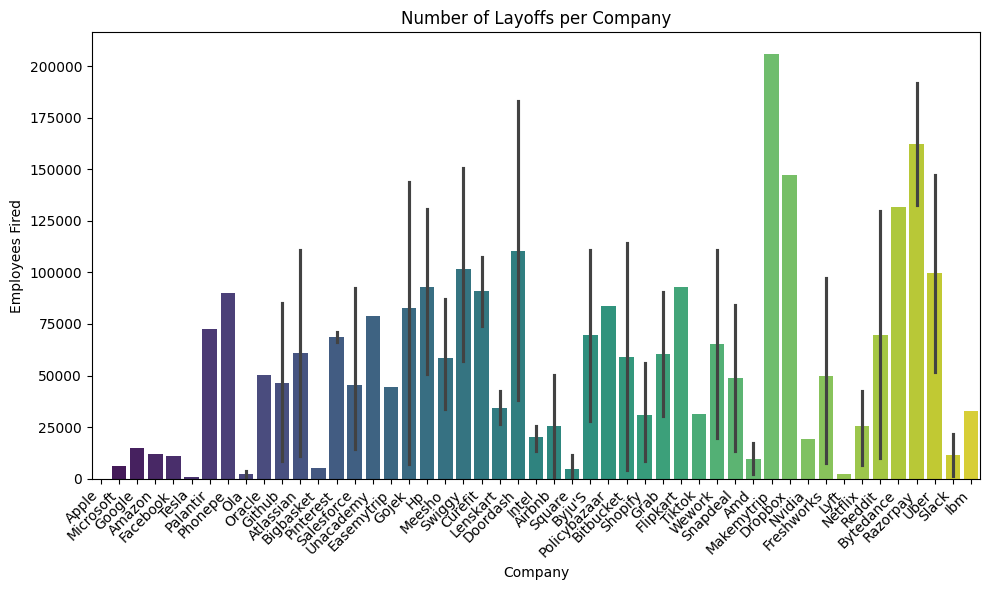

In [19]:
#Create a bar chart of layoffs per company
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="company", y="employees_fired", palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Number of Layoffs per Company")
plt.xlabel("Company")
plt.ylabel("Employees Fired")
plt.tight_layout()
plt.show()

Part 4 – Statistics

In [20]:
#Calculate mean, median, variance, and standard deviation of employees_fired.
print(df['employees_fired'].mean())
print(df['employees_fired'].median())
print(df['employees_fired'].var())
print(df['employees_fired'].std())

57355.62
42510.5
2794420028.9248486
52862.27415581786


In [21]:
#Find the probability that a company laid off more than 5% of its employees.
df["layoff_percentage"] = (df["employees_fired"] / df["company_size"]) * 100
prob_5pct = (df["layoff_percentage"] > 5).mean()   # fraction of companies
print("Probability of layoffs > 5%:", prob_5pct)

Probability of layoffs > 5%: 0.63


In [22]:
#Find the percentage of companies with layoffs greater than 10,000 employees.
pct_large_layoffs = (df["employees_fired"] > 10000).mean() * 100
print("Percentage of Companies with >10,000 layoffs:", pct_large_layoffs, "%")

Percentage of Companies with >10,000 layoffs: 78.0 %


Part 5 – Linear Algebra & NumPy

In [23]:
#Convert company_size and employees_fired into NumPy arrays.
company_size = df["company_size"].to_numpy()
employees_fired = df["employees_fired"].to_numpy()
print("Company Size Array:", company_size[:5])
print("Employees Fired Array:", employees_fired[:5])

Company Size Array: [ 147000  181000  139500 1300000   60750]
Employees Fired Array: [    0  6000 15000 12000 11000]


In [24]:
#Perform vector subtraction (company_size - employees_fired).
remaining_employees = company_size - employees_fired
print("Vector Subtraction (Remaining Employees):", remaining_employees[:5])

Vector Subtraction (Remaining Employees): [ 147000  175000  124500 1288000   49750]


In [25]:
#Compute the dot product of company_size and employees_fired.
dot_product = np.dot(company_size, employees_fired)
print("Dot Product:", dot_product)

Dot Product: 5915259851695


In [26]:
#Perform matrix multiplication:
features = np.column_stack((company_size, employees_fired))
weights = np.array([0.4, 0.6])
result = features @ weights
print("Matrix Multiplication Result (first 10 values):", result[:10])

Matrix Multiplication Result (first 10 values): [ 58800.   76000.   64800.  527200.   30900.   28600.  447024.2 394313.8
  56607.  476733.6]


Part 6 – Feature Engineering

In [27]:
#Create a new column Layoff_Percentage = (employees_fired / company_size) * 100 (rounded to 2 decimal places).
df['Layoff_Percentage'] = round((df['employees_fired'] / df['company_size']) * 100, 2)


In [28]:
#Create a High_Layoff column (1 if Layoff_Percentage > 5, else 0).
df['High_Layoff'] = np.where(df['Layoff_Percentage'] > 5, 1, 0)
df

,company,company_size,employees_fired,layoff_percentage,Layoff_Percentage,High_Layoff
0,Apple,147000,0,0.0,0.0,0
1,Microsoft,181000,6000,3.314917,3.31,0
2,Google,139500,15000,10.752688,10.75,1
3,Amazon,1300000,12000,0.923077,0.92,0
4,Facebook,60750,11000,18.106996,18.11,1
...,...,...,...,...,...,...
95,Airbnb,448047,1012,0.225869,0.23,0
96,Uber,1206139,51658,4.282923,4.28,0
97,Gojek,302489,7084,2.341903,2.34,0
98,Freshworks,646552,7670,1.186293,1.19,0


In [29]:
#ank companies into quartiles based on Layoff_Percentage.
df['Layoff_Quartile'] = pd.qcut(df['Layoff_Percentage'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

Part 7 – SQL Simulation in Pandas

In [30]:
#Select all companies with Layoff_Percentage > 5 and order them by Layoff_Percentage descending.
high_layoff_companies = df[df['Layoff_Percentage'] > 5].sort_values(by='Layoff_Percentage', ascending=False)
print("Companies with Layoff_Percentage > 5 (descending):")
print(high_layoff_companies)

Companies with Layoff_Percentage > 5 (descending):
       company  company_size  employees_fired  layoff_percentage  \
4     Facebook         60750            11000          18.106996   
40     Curefit        497712            74175          14.903197   
36     Shopify        449561            66606          14.815787   
33  Salesforce        633768            92624          14.614812   
63  Makemytrip       1424064           206083           14.47147   
..         ...           ...              ...                ...   
38        Grab        541906            30561           5.639539   
17   Unacademy       1432228            79039           5.518605   
73     Netflix        798065            42537           5.330017   
46    Snapdeal        256183            13636           5.322758   
10      Github       1427799            75006            5.25326   

    Layoff_Percentage  High_Layoff Layoff_Quartile  
4               18.11            1              Q4  
40               14.9     

In [31]:
#Get the top 3 companies with the highest layoff counts.
top3_fired_alt = df.sort_values(by='employees_fired', ascending=False).head(3)
print(top3_fired_alt)


       company  company_size  employees_fired  layoff_percentage  \
63  Makemytrip       1424064           206083           14.47147   
89    Razorpay       1387660           191727          13.816569   
30    Doordash       1468609           189338          12.892336   

    Layoff_Percentage  High_Layoff Layoff_Quartile  
63              14.47            1              Q4  
89              13.82            1              Q4  
30              12.89            1              Q4  


In [32]:
#Sort companies alphabetically and show company and Layoff_Percentage.
alphabetical = df[['company', 'Layoff_Percentage']].sort_values(by='company')
print("\nCompanies sorted alphabetically:")
print(alphabetical)


Companies sorted alphabetically:
      company  Layoff_Percentage
29     Airbnb              10.29
95     Airbnb               0.23
3      Amazon               0.92
56        Amd               0.33
61        Amd               1.93
..        ...                ...
87       Uber              12.53
96       Uber               4.28
17  Unacademy               5.52
43     Wework              13.78
62     Wework               9.28

[100 rows x 2 columns]


Part 8 – Insights

In [33]:
#Which company had the highest layoffs in percentage terms?
max_layoff_percentage = df.loc[df['Layoff_Percentage'].idxmax(), 'company']
print("Company with highest layoff percentage:", max_layoff_percentage)


Company with highest layoff percentage: Facebook


In [34]:
#Which company had the most employees fired in absolute numbers?
max_employees_fired = df.loc[df['employees_fired'].idxmax(), 'company']
print("Company with most employees fired:", max_employees_fired)

Company with most employees fired: Makemytrip


In [35]:
#What is the average layoff percentage across all companies?
average_layoff_percentage = df['Layoff_Percentage'].mean()
print("Average layoff percentage:", round(average_layoff_percentage, 2))

Average layoff percentage: 7.38


In [36]:
#Which quartile of Layoff_Percentage has the highest average company_size?
quartile_avg_size = df.groupby('Layoff_Quartile')['company_size'].mean().idxmax()
print("Quartile with highest average company size:", quartile_avg_size)

Quartile with highest average company size: Q4


C:\Users\dukas\AppData\Local\Temp\ipykernel_16744\679171427.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_avg_size = df.groupby('Layoff_Quartile')['company_size'].mean().idxmax()
